In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dane = pd.read_csv('C:/Users/skach/OneDrive/Pulpit/Praca/empik/Dane.csv', ";")
dane

C:\Users\skach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion
0,100001,2020-06-18,02:48:50,5655.0,"4 919,85",2,15
1,100002,2020-06-18,03:14:27,2038.0,"1 548,88",4,18
2,100003,2020-06-18,03:52:59,1553.0,"1 195,81",1,26
3,100004,2020-06-18,06:13:20,4460.0,"3 701,80",1,22
4,100005,2020-06-18,06:13:39,4837.0,"4 450,04",3,19
...,...,...,...,...,...,...,...
120468,219996,2023-03-15,22:20:56,6321.0,"5 815,32",1,21
120469,219997,2023-03-15,23:02:13,9080.0,"7 627,20",3,19
120470,219998,2023-03-15,23:21:17,4461.0,"3 345,75",4,17
120471,219999,2023-03-15,23:39:41,5460.0,"4 477,20",2,26


In [3]:
#2.1
dane['COGS'] = dane['COGS'].str.strip().str.replace(' ', '').str.replace(",",".").astype(float)
dane['Margin'] = dane['OrderValue'] - dane['COGS']
dane

,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion,Margin
0,100001,2020-06-18,02:48:50,5655.0,4919.85,2,15,735.15
1,100002,2020-06-18,03:14:27,2038.0,1548.88,4,18,489.12
2,100003,2020-06-18,03:52:59,1553.0,1195.81,1,26,357.19
3,100004,2020-06-18,06:13:20,4460.0,3701.80,1,22,758.20
4,100005,2020-06-18,06:13:39,4837.0,4450.04,3,19,386.96
...,...,...,...,...,...,...,...,...
120468,219996,2023-03-15,22:20:56,6321.0,5815.32,1,21,505.68
120469,219997,2023-03-15,23:02:13,9080.0,7627.20,3,19,1452.80
120470,219998,2023-03-15,23:21:17,4461.0,3345.75,4,17,1115.25
120471,219999,2023-03-15,23:39:41,5460.0,4477.20,2,26,982.80


In [4]:
#2.2
dane['DateOrder'] = pd.to_datetime(dane['DateOrder'])
dane['Year'] = dane['DateOrder'].dt.year
dane['CumMargin'] = dane.groupby('Year')['Margin'].cumsum()
dane

,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion,Margin,Year,CumMargin
0,100001,2020-06-18,02:48:50,5655.0,4919.85,2,15,735.15,2020,735.15
1,100002,2020-06-18,03:14:27,2038.0,1548.88,4,18,489.12,2020,1224.27
2,100003,2020-06-18,03:52:59,1553.0,1195.81,1,26,357.19,2020,1581.46
3,100004,2020-06-18,06:13:20,4460.0,3701.80,1,22,758.20,2020,2339.66
4,100005,2020-06-18,06:13:39,4837.0,4450.04,3,19,386.96,2020,2726.62
...,...,...,...,...,...,...,...,...,...,...
120468,219996,2023-03-15,22:20:56,6321.0,5815.32,1,21,505.68,2023,8774356.15
120469,219997,2023-03-15,23:02:13,9080.0,7627.20,3,19,1452.80,2023,8775808.95
120470,219998,2023-03-15,23:21:17,4461.0,3345.75,4,17,1115.25,2023,8776924.20
120471,219999,2023-03-15,23:39:41,5460.0,4477.20,2,26,982.80,2023,8777907.00


In [6]:
kpi = 40000000
year_21 = dane[dane['Year'] == 2021]


if any(year_21['CumMargin'] >= kpi):
    dni = year_21[year_21['CumMargin'] >= kpi]['DateOrder']
    print(f"KPI of 40 000 000 was achieved in {dni.min()}.")
else:
    print("KPI was not achieved.")

KPI of 40 000 000 was achieved in 2021-12-19 00:00:00.


In [7]:
year_22 = dane[dane['Year'] == 2022]
if any(year_22['CumMargin'] >= kpi):
    dni = year_22[year_22['CumMargin'] >= kpi]['DateOrder']
    print(f"KPI of 40 000 000 was achieved in {dni.min()}.")
else:
    print("KPI was not achieved.")

KPI of 40 000 000 was achieved in 2022-12-06 00:00:00.


In [8]:
#2.3
num_channels = 4
channel_dataframes = []
for channel_num in range(1, num_channels + 1):
    channel_df = dane[dane["OrderChannel"] == channel_num].sort_values(['OrderRegion','DateOrder','TimeOrder'])
    channel_dataframes.append(channel_df)
    channel_df.to_csv(f'dane_channel_{channel_num}.csv', index = False)

In [9]:
#2.4
dane = dane.drop_duplicates()
dane = dane.dropna(subset=['OrderValue','COGS'], how = 'all')
dane['COGS'].fillna(dane['OrderValue'] * 0.85, inplace = True)

In [10]:
#2.5
dane['DateOrder'] = pd.to_datetime(dane['DateOrder'])
dane['TimeOrder'] = pd.to_datetime(dane['TimeOrder'])
year_2022 = dane[dane['Year'] == 2022]
year_2022

dzien = year_2022[(year_2022['TimeOrder'].dt.hour >= 7) & (year_2022['TimeOrder'].dt.hour < 23)]
noc = year_2022[(year_2022['TimeOrder'].dt.hour >= 23) & (year_2022['TimeOrder'].dt.hour < 7)]

suma_noc = noc.groupby(['OrderChannel', 'OrderRegion', noc['DateOrder'].dt.month])['OrderValue'].sum()
liczba_transakcji_noc = noc.groupby(['OrderChannel', 'OrderRegion', noc['DateOrder'].dt.month]).size()

suma_dzien = dzien.groupby(['OrderChannel', 'OrderRegion', dzien['DateOrder'].dt.month])['OrderValue'].sum()
liczba_transakcji_dzien = dzien.groupby(['OrderChannel', 'OrderRegion', dzien['DateOrder'].dt.month]).size()

print(suma_noc)
print(liczba_transakcji_noc)

print(suma_dzien)
print(liczba_transakcji_dzien)

Series([], Name: OrderValue, dtype: float64)
Series([], dtype: int64)
OrderChannel  OrderRegion  DateOrder
1             1            1            208379.0
                           2            159649.0
                           3            143480.0
                           4            167123.0
                           5            180839.0
                                          ...   
4             27           8            109881.0
                           9            125167.0
                           10           160749.0
                           11           157448.0
                           12           151557.0
Name: OrderValue, Length: 1295, dtype: float64
OrderChannel  OrderRegion  DateOrder
1             1            1            30
                           2            25
                           3            19
                           4            22
                           5            32
                                        ..
4           

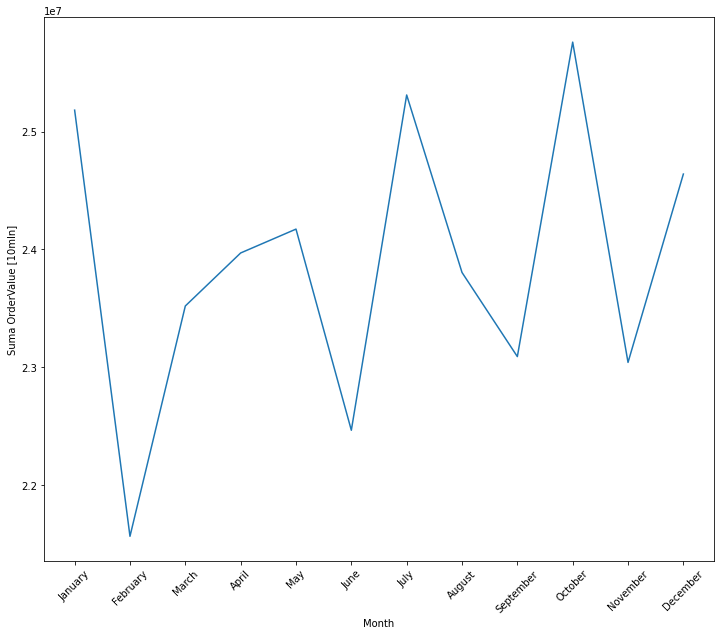

In [11]:
#2.6
dane['DateOrder'] = pd.to_datetime(dane['DateOrder'])
year_2022 = dane[dane['DateOrder'].dt.year == 2022]
wykres = year_2022.groupby(year_2022['DateOrder'].dt.month)['OrderValue'].sum()

plt.figure(figsize=(12,10))
plt.plot(wykres)
plt.xlabel('Month')
plt.ylabel('Suma OrderValue [10mln]')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()